# MP305 Activity Networks

## Overview
A project consists of $N$ activities $A,B,C,....$ each taking some time to complete which obey precedence relations e.g. $C$ takes place after $A$ etc.

In this Python file activities are described by a set `Act` e.g.  `Act=set(["A","B","C"])` where `"A"`, `"B"` and `"C"` are just string names for activities such as `"First Job"`, `"Tea Break"`, ...etc

The time taken to complete the activities is described by a Python dictionary called `Time` e.g. `Time["First Job"]=3`

Precedence relations are described by a Python dictionary called `Prec` with entries giving the set of preceeding activities e.g.  `Prec["First Job"]=set()` (where `set()` is the empty set) if no preceeding activity exists or `Prec["Tea Break"]={"First Job"}` if `"Tea Break"` must take place after the first job has been completed.


##  The `Activity` Python function
This takes the given activities set `Act`, the dictionary `Time` and the precedence relations dictionary `Prec` and relabels the activities according to the Fulkerson algorithm from 0 to $N+1$ where the START has label $0$ and the FINISH has label $N+1$.  

A list `G` of arcs `(i,j)` describing the Activity Network $G$ with vertices $(i,j)$  labelled by $0,1,2,.. N+1$ is produced which describes the network. A list `T` giving the completion times for the activities is also produced.

The Activity Network is drawn but note that it may not always shown in its simplest form.

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import display, Math, Latex

In [2]:
def Activity (Act, Time, Prec):
    global G,T,Alist,FinInd,LabelAi
    FinInd = len(Act) + 1
    T=[0 for i in range(FinInd+1)]
    LabelAi=dict();LabeliA=dict()
    LabelAi[0] = "Start"; LabeliA["Start"] = 0
    LabelAi[FinInd] = "Finish"; LabeliA["Finish"] = FinInd
    NewP=dict()
    for AA in Act:
        NewP[AA] = Prec[AA]
    Acurrent = Act
    iA=0
    Alist = [[0]]
    while (Acurrent != set()):
        NewA = set()
        for Ai in Acurrent:
            if NewP[Ai] == set():
                NewA = NewA | set([Ai])
        NewAlist = []
        inew=1
        for An in NewA:
            LabelAi[inew + iA] = An;  LabeliA[An] = inew + iA
            NewAlist = NewAlist + [inew + iA]
            T[inew + iA] = Time[An]
            inew=inew+1
        Alist = Alist + [NewAlist]
        iA = iA + len(NewA)
        Acurrent = Acurrent - NewA
        for Ai in Act:
            NewP[Ai] = NewP[Ai] - NewA
    Alist = Alist + [[FinInd]]
    G = set()
    FinNode = set([i for i in range(1,FinInd)])
    for AA in Act:
        iAA = LabeliA[AA]
        if Prec[AA] == set():
            G = G | set([(0,iAA)])
        else:
            for AB in Prec[AA]:
                iAB = LabeliA[AB]
                FinNode = FinNode - set([iAB])
                G = G | set([(iAB,iAA)])
    for iA in FinNode:
        G = G | set([(iA,FinInd)])
    print("The Activities have been relabeled with completion times:")
    for i in range(0, FinInd + 1):
        print("Activity ", LabelAi[i], " is activity ", i, " with completion time ", T[i])
    print("")
    print("The Activity Network is decribed by: ", G)
    plt.figure(figsize=(6, 6))
    G_Graph=nx.DiGraph()
    for arc in G:
        i,j=arc
        G_Graph.add_edge(i,j)
    Gh=20; Gw=200
    Gpos={0:(0,Gh/2),FinInd:(Gw,Gh/2)}
    ncol=len(Alist)-2
    delx=Gw/(ncol+1)
    for i in range(1,ncol+1):
        Ai=Alist[i]
        nAi=len(Ai)
        dely=Gh/(nAi+1)
        for j in range(nAi):
            Aij=Ai[nAi-j-1]
            Gpos[Aij]=(i*delx,(1+j)*dely)
    nx.draw(G_Graph,pos=Gpos, with_labels=True,node_size=1000,font_size=15,node_color='yellow',arrowsize=30)
    #print("")
   # nx.draw(G_Graph,labels=LabelAi,pos=Gpos, with_labels=True,node_size=1000,font_size=15,node_color='yellow',arrowsize=30)

## Q1. The Chemical Process example (slide 2, file mp305Lh.pdf)
 Define the set of activities, completion times and precedence relations

In [3]:
Act=set(["A","B","C","D","E","F","G"])

Time=dict()

Time["A"]=2; Time["B"]=1; Time["C"]=3; Time["D"]=3
Time["E"]=2; Time["F"]=1; Time["G"]=3

Prec=dict()

Prec["A"]=set(); Prec["B"]=set(); Prec["C"]=set() # set() is the empty set
Prec["D"]={"A","B"}
Prec["E"]={"B","C","D"}
Prec["F"]={"A","D"}
Prec["G"]={"E","F"}

In [4]:
Act

{'A', 'B', 'C', 'D', 'E', 'F', 'G'}

In [5]:
Time

{'A': 2, 'B': 1, 'C': 3, 'D': 3, 'E': 2, 'F': 1, 'G': 3}

In [6]:
Prec

{'A': set(),
 'B': set(),
 'C': set(),
 'D': {'A', 'B'},
 'E': {'B', 'C', 'D'},
 'F': {'A', 'D'},
 'G': {'E', 'F'}}

The Activities have been relabeled with completion times:
Activity  Start  is activity  0  with completion time  0
Activity  A  is activity  1  with completion time  2
Activity  B  is activity  2  with completion time  1
Activity  C  is activity  3  with completion time  3
Activity  D  is activity  4  with completion time  3
Activity  F  is activity  5  with completion time  1
Activity  E  is activity  6  with completion time  2
Activity  G  is activity  7  with completion time  3
Activity  Finish  is activity  8  with completion time  0

The Activity Network is decribed by:  {(0, 1), (2, 4), (1, 5), (0, 3), (4, 6), (1, 4), (5, 7), (6, 7), (4, 5), (0, 2), (2, 6), (3, 6), (7, 8)}


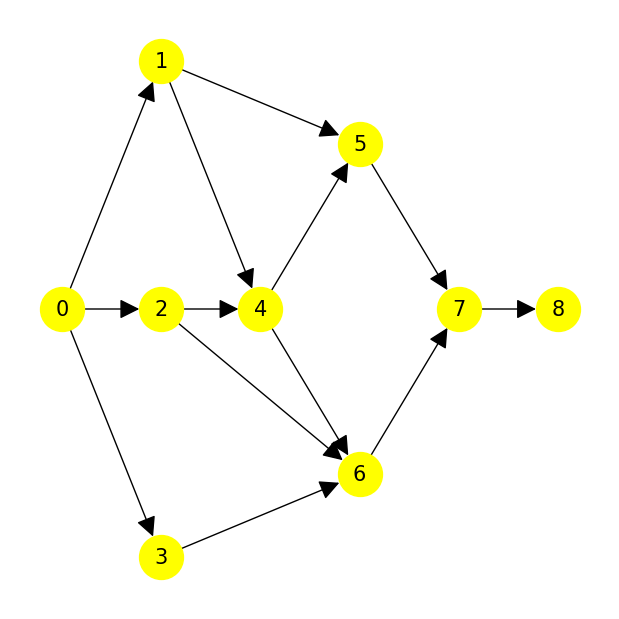

In [7]:
Activity(Act,Time,Prec)

## The function `CritPath`
This computes the critical path, the minimum project completion time, the earliest and  latest starting times and the float for each activity for an activity network `G` with completion times `T`.

In [8]:
def CritPath (G, T):
    global FinInd,e,l,f,In,Out
    In=[[] for i in range(0, FinInd + 1)]
    Out=[[] for i in range(0, FinInd + 1)]
    for arc in G:
        i,j=arc
        In[j] = In[j]  + [i]
        Out[i]  = Out[i] + [j]

    # Forward scan for earliest starting times
    e=[0 for i in range(FinInd + 1)]
    p=[0 for i in range(FinInd + 1)]
    for j in range(1, FinInd + 1):
        #v = In[j][1]
        #e[j] = e[v] + T[v]
        #p[j] = v
        for u in In[j]:
            newe = e[u] + T[u]
            if e[j] <= newe:
                e[j] = newe
                p[j] = u

    # Backward scan for critical path
    cpath = [FinInd]
    start = FinInd
    while (not(start == 0)):
        start = p[start]
        cpath = [start] + cpath

    TTotal = 0
    for j in range(1, FinInd):
        TTotal = TTotal + T[j]
    print("The Total amount of work to be completed is:", TTotal)
    print("The Critical Path is:", cpath)
    print("The Minimum Completion Time with sufficient workers is:", e[FinInd])

    # latest starting times
    l=[0 for i in range(FinInd+1)]
    f=[0 for i in range(FinInd+1)]
    l[FinInd]=e[FinInd]
    for i in range(FinInd-1, -1, -1):
        l[i]=min([l[j] for j in Out[i]])-T[i]
        f[i]=l[i]-e[i]
    data=[["    Activity", "Earliest", "Latest", "Float"]]
    data=data +[[i,e[i],l[i],f[i]] for i in range(FinInd+1)]
    for row in data:
        print("{: >10}{: >10}{: >10}{: >10}".format(*row))

## Q.1 Example

In [9]:
CritPath(G,T)

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0


## The function `CritSchedule`
This implements the Critical Path Schedule for an acivity network `G` with times `T` by assigning tasks to `Nw` workers.  The output describes the assignment of activities to each worker together with a graphical display of the history over time.


This function calls the functions `RankSet1`, which ranks a set of tasks (according to latest starting times) and `GraphSchedule` which produces a graphic for the final schedule

In [10]:
def RankSet1 (vset):
    global l
    vlist=list(vset)
    nlist = len(vlist)
    for i in range(nlist):
        for j in range(i,nlist):
                vi = vlist[i];  vj = vlist[j]
                ri = l[vi]; rj = l[vj]
                if rj < ri or (ri == rj and vj < vi):
                    vlist[i],vlist[j]=vlist[j],vlist[i]
    return(vlist)

In [11]:
def GraphSchedule (Wseq,Time):
    Nw=len(Wseq)
    colorw={1:"green",2:"yellow",3:"orange",4:"blue",5:"red"}
    fig = plt.figure()
    ax = fig.add_subplot()
    Tmax=0
    for nw in range(1,Nw+1):
        Wseqn=Wseq[nw]
        AW=int(len(Wseqn)/4) # no of tasks for a worker
        y0=nw-1
        for iw in range(AW):
            t0,Aiw,t1=Wseqn[0+4*iw:3+4*iw]
            x0=t0
            width=t1-t0
            Tmax=max(Tmax,t1)
            rect = Rectangle((x0, y0), width, 1, ec ='black',lw = 2,color=colorw[nw])
            ax.add_patch(rect)
            ax.text(x0+width/2, y0+1/2, Aiw,size=15)
        ax.text(-Time/3, y0+1/2, "Worker "+str(nw),size=15)

    # tickmarks and axes range and labels
    ax.set_xticks([k for k in range(Time+1)])
    ax.set_yticks([])
    plt.xlim([0, Time])
    plt.ylim([0, Nw])
    plt.xlabel('Time',size=15)
    plt.show()

In [12]:
def CritSchedule (G, T, Nw):
#
# This function finds the optimal schedule according to the critical path scheduling algorithm for Nw workers.
# Any idle worker is always assigned an activity if possible.
#
    global FinInd,In,Out,e,workertaskseq
    CritPath(G, T)
    print("")
# Total time for all activities
    Tot = 0
    for k in range(1, FinInd):
        Tot = Tot + T[k]
    Topt = max(Tot / Nw, e[FinInd])
# sequences of tasks undertaken by worker i
    workertaskseq=dict()
    for i in range(1, Nw + 1):
        workertaskseq[i] = []
#set of workers available
    availset = set([k for k in range(1,Nw+1)])
#worker assigned to activity k
    Activity=dict()
#
# Initial activities Done, Current and Next
#
    Current = set(); Done = set(); Next = set(Out[0]); Time = 0
#
# The Time left for activities
#
    Tleft=dict()
    for i in range(0, FinInd + 1):
        Tleft[i] = T[i]

    while (len(Done) != FinInd-1):
#
# Assign activities to available workers:
#
        Nextlist = RankSet1(set(Next))
        noc = len(Current)
        for i in range(1, min(Nw - noc, len(Next)) + 1):
            nextjob = Nextlist[i-1]
            workeri = list(availset)[0]
            Activity[nextjob] = workeri
            availset = availset - set([workeri])
            workertaskseq[workeri] = workertaskseq[workeri] + [Time, nextjob]
            Current = Current | set([nextjob])
            Next = Next - set([nextjob])
        print("Time=",Time,"Current activities=",Current)
        print("")
 # times to complete current tasks
        Tset = set()
        for v in Current:
            Tset = Tset | set([Tleft[v]])
        DelT = min(tuple(Tset))
        Time = Time + DelT
        for v in Current:
            Tleft[v] = Tleft[v] - DelT
            if Tleft[v] == 0:
                print("Time=",Time,"Activity",v,"completed")
                workerv = Activity[v]
                workertaskseq[workerv] = workertaskseq[workerv] +[Time, v]
                availset = availset | set([workerv])
                Done = Done | set([v])
                Current = Current - set([v])
                for w in Out[v]:
                    if set(In[w]) - Done == set():
                        Next = Next | set([w]) - set([FinInd])
    if Time == Topt:
        print("")
        print("Optimal Schedule Found for",Nw,"Workers!")
        if Topt == e[FinInd]:
            print("The Minimal Completion Time of",e[FinInd], "is achieved for",Nw," Workers!")
    GraphSchedule(workertaskseq,Time)

## Q.1 example Find Critical Schedule for first example in class (slide 2, mp305Lh.pdf) for 1,2,3 workers

In [14]:
Act=set(["A","B","C","D","E","F","G"])

Time=dict()

Time["A"]=2; Time["B"]=1; Time["C"]=3; Time["D"]=3
Time["E"]=2; Time["F"]=1; Time["G"]=3

Prec=dict()

Prec["A"]=set(); Prec["B"]=set(); Prec["C"]=set() # set() is the empty set
Prec["D"]={"A","B"}
Prec["E"]={"B","C","D"}
Prec["F"]={"A","D"}
Prec["G"]={"E","F"}

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0

Time= 0 Current activities= {1}

Time= 2 Activity 1 completed
Time= 2 Current activities= {2}

Time= 3 Activity 2 completed
Time= 3 Current activities= {3}

Time= 6 Activity 3 completed
Time= 6 Current activities= {4}

Time= 9 Activity 4 completed
Time= 9 Current activities= {6}

Time= 11 Activity 6 completed
Time= 11 Current activities= {5}

Time= 12 Activity 5 completed
Time= 12 Current activities= {7}

Time= 15 Activity 7 completed


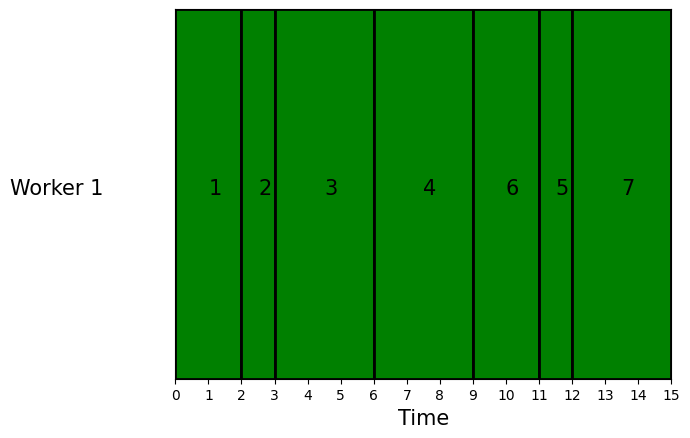

In [15]:
CritSchedule(G,T,1)

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0

Time= 0 Current activities= {1, 2}

Time= 1 Activity 2 completed
Time= 1 Current activities= {1, 3}

Time= 2 Activity 1 completed
Time= 2 Current activities= {3, 4}

Time= 4 Activity 3 completed
Time= 4 Current activities= {4}

Time= 5 Activity 4 completed
Time= 5 Current activities= {5, 6}

Time= 6 Activity 5 completed
Time= 6 Current activities= {6}

Time= 7 Activity 6 completed
Time= 7 Current activities= {7}

Time= 10 Activity 7 co

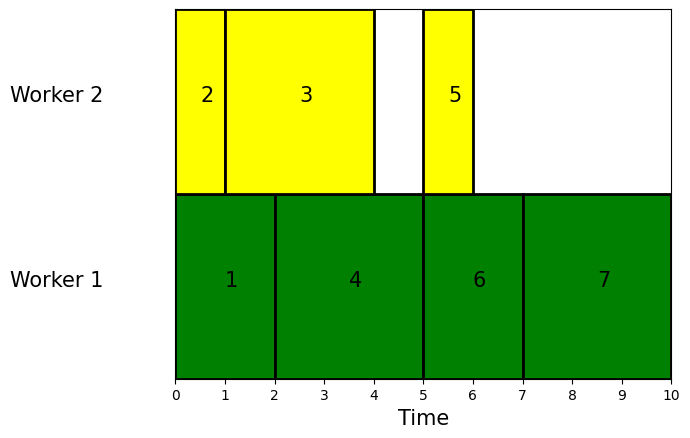

In [16]:
CritSchedule(G,T,2)

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0

Time= 0 Current activities= {1, 2, 3}

Time= 1 Activity 2 completed
Time= 1 Current activities= {1, 3}

Time= 2 Activity 1 completed
Time= 2 Current activities= {3, 4}

Time= 3 Activity 3 completed
Time= 3 Current activities= {4}

Time= 5 Activity 4 completed
Time= 5 Current activities= {5, 6}

Time= 6 Activity 5 completed
Time= 6 Current activities= {6}

Time= 7 Activity 6 completed
Time= 7 Current activities= {7}

Time= 10 Activity 7

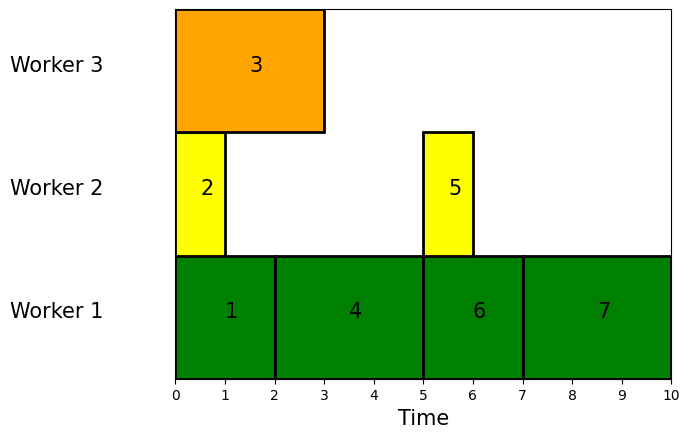

In [17]:
CritSchedule(G,T,3)

## The function `ProtSchedule`  
This implements the Protection Scheme Schedule for assigning tasks to `Nw` workers. The output describes the assignement of activities to each worker together with a graphical display of the history over time.

This function calls RankSet2 which ranks  a set of tasks according to earliest + lastest starting times

In [18]:
def RankSet2 (vset):
    global l,e
    vlist=list(vset)
    nlist = len(vlist)
    for i in range(nlist):
        for j in range(i,nlist):
                vi = vlist[i];  vj = vlist[j]
                ri = e[vi]+l[vi]; rj =e[vj]+ l[vj]
                if rj < ri or (ri == rj and vj < vi):
                    vlist[i],vlist[j]=vlist[j],vlist[i]
    return(vlist)

In [19]:
def ProtSchedule (G, T, Nw):
#
# This function finds the optimal schedule according to the critical path scheduling algorithm for Nw workers.
# Any idle worker is always assigned an activity if possible.
#
    global FinInd,In,Out,e,workertaskseq
    CritPath(G, T)
    print("")
# Total time for all activities
    Tot = 0
    for k in range(1, FinInd):
        Tot = Tot + T[k]
    Topt = max(Tot / Nw, e[FinInd])
# sequences of tasks undertaken by worker i
    workertaskseq=dict()
    for i in range(1, Nw + 1):
        workertaskseq[i] = []
#set of workers available
    availset = set([k for k in range(1,Nw+1)])
#worker assigned to activity k
    Activity=dict()
#
# Initial activities Done, Current and Next
#
    Current = set(); Done = set(); Next = set(Out[0]); Time = 0
#
# The Time left for activities
#
    Tleft=dict()
    for i in range(0, FinInd + 1):
        Tleft[i] = T[i]
    AllRank=RankSet2(set([i for i in range(1,FinInd+1)]));
    while (len(Done) != FinInd-1):
#
# Assign activities to available workers:
#
        Nextlist = RankSet2(set(Next))
        noc = len(Current)
        for i in range(1, min(Nw - noc, len(Next)) + 1):
            nextjob = Nextlist[i-1]
            workeri = list(availset)[0]
            if nextjob==AllRank[0]:
                Activity[nextjob] = workeri
                availset = availset - set([workeri])
                workertaskseq[workeri] = workertaskseq[workeri] + [Time, nextjob]
                Current = Current | set([nextjob])
                Next = Next - set([nextjob])
                AllRank=RankSet2(set(AllRank) - set([nextjob]))
        print("Time=",Time,"Current activities=",Current)
        print("")
 # times to complete current tasks
        Tset = set()
        for v in Current:
            Tset = Tset | set([Tleft[v]])
        DelT = min(tuple(Tset))
        Time = Time + DelT
        for v in Current:
            Tleft[v] = Tleft[v] - DelT
            if Tleft[v] == 0:
                print("Time=",Time,"Activity",v,"completed")
                workerv = Activity[v]
                workertaskseq[workerv] = workertaskseq[workerv] +[Time, v]
                availset = availset | set([workerv])
                Done = Done | set([v])
                Current = Current - set([v])
                for w in Out[v]:
                    if set(In[w]) - Done == set():
                        Next = Next | set([w]) - set([FinInd])
    if Time == Topt:
        print("")
        print("Optimal Schedule Found for",Nw,"Workers!")
        if Topt == e[FinInd]:
            print("The Minimal Completion Time of",e[FinInd], "is achieved for",Nw," Workers!")
    GraphSchedule(workertaskseq,Time)

## Q.1  Example
Find the Protected Schedule for first example in class (slide 2, mp305Lh.pdf) for 2,3 workers

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0

Time= 0 Current activities= {1, 2}

Time= 1 Activity 2 completed
Time= 1 Current activities= {1, 3}

Time= 2 Activity 1 completed
Time= 2 Current activities= {3, 4}

Time= 4 Activity 3 completed
Time= 4 Current activities= {4}

Time= 5 Activity 4 completed
Time= 5 Current activities= {5, 6}

Time= 6 Activity 5 completed
Time= 6 Current activities= {6}

Time= 7 Activity 6 completed
Time= 7 Current activities= {7}

Time= 10 Activity 7 co

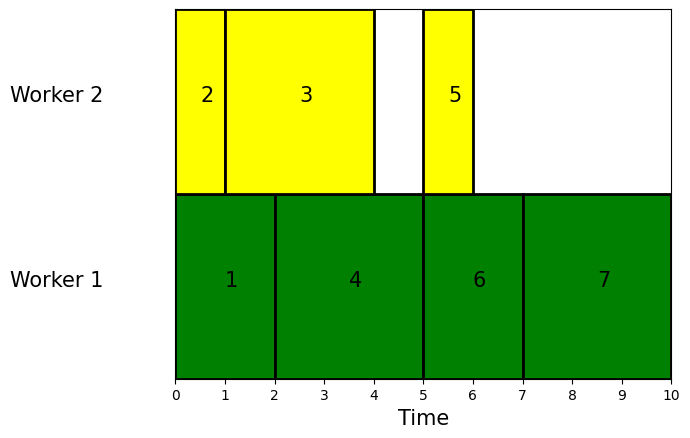

In [20]:
ProtSchedule (G, T, 2)

The Total amount of work to be completed is: 15
The Critical Path is: [0, 1, 4, 6, 7, 8]
The Minimum Completion Time with sufficient workers is: 10
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0         1         1
         3         0         2         2
         4         2         2         0
         5         5         6         1
         6         5         5         0
         7         7         7         0
         8        10        10         0

Time= 0 Current activities= {1, 2, 3}

Time= 1 Activity 2 completed
Time= 1 Current activities= {1, 3}

Time= 2 Activity 1 completed
Time= 2 Current activities= {3, 4}

Time= 3 Activity 3 completed
Time= 3 Current activities= {4}

Time= 5 Activity 4 completed
Time= 5 Current activities= {5, 6}

Time= 6 Activity 5 completed
Time= 6 Current activities= {6}

Time= 7 Activity 6 completed
Time= 7 Current activities= {7}

Time= 10 Activity 7

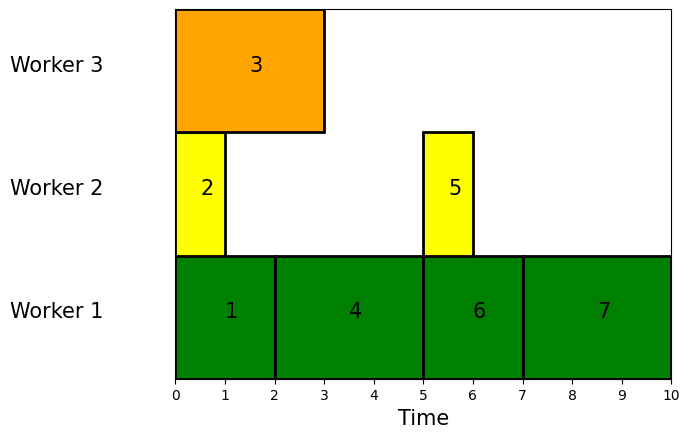

In [21]:
ProtSchedule (G, T, 3)

## Q.2 (*)
Find the critical path and the minimal completion time for the following assembly problem with 10 activities ($A-J$):

$A$ precedes activity $J$ and the completion time is 7.

$B$ precedes activity $J$ and the completion time is 7.

$C$ precedes activity $J$ and the completion time is 7.

$D$ precedes activities $C$, $E$, $F$ and $J$ and the completion time is 2.

$E$ precedes activities $C$, $H$, $I$ and $J$ and the completion time is 3.

$F$ precedes activities $G$, $H$ and $I$ and the completion time is 2.

$G$ precedes activities $H$ and $I$ and the completion time is 2.

$H$ precedes Finish and the completion time is 8.

$I$ precedes Finish and the completion time is 8.

$J$ precedes Finish and the completion time is 18.

In [33]:
# Activities
Act = set(["A","B","C","D","E","F","G","H","I","J"])

# Completion times
Time = dict()
Time["A"] = 7
Time["B"] = 7
Time["C"] = 7
Time["D"] = 2
Time["E"] = 3
Time["F"] = 2
Time["G"] = 2
Time["H"] = 8
Time["I"] = 8
Time["J"] = 18

# Precedence dictionary
Prec = dict()
Prec["A"] = set()                     # No predecessors
Prec["B"] = set()                     # No predecessors
Prec["C"] = {"D","E"}                 # D and E must finish before C
Prec["D"] = set()                     # No predecessors
Prec["E"] = {"D"}                     # D must finish before E
Prec["F"] = {"D"}                     # D must finish before F
Prec["G"] = {"F"}                     # F must finish before G
Prec["H"] = {"E","F","G"}             # E, F, G must finish before H
Prec["I"] = {"E","F","G"}             # E, F, G must finish before I
Prec["J"] = {"A","B","C","D","E"}

The Activities have been relabeled with completion times:
Activity  Start  is activity  0  with completion time  0
Activity  A  is activity  1  with completion time  7
Activity  B  is activity  2  with completion time  7
Activity  D  is activity  3  with completion time  2
Activity  F  is activity  4  with completion time  2
Activity  E  is activity  5  with completion time  3
Activity  G  is activity  6  with completion time  2
Activity  C  is activity  7  with completion time  7
Activity  J  is activity  8  with completion time  18
Activity  I  is activity  9  with completion time  8
Activity  H  is activity  10  with completion time  8
Activity  Finish  is activity  11  with completion time  0

The Activity Network is decribed by:  {(0, 1), (10, 11), (3, 4), (4, 9), (3, 7), (4, 6), (1, 8), (5, 7), (5, 10), (0, 2), (6, 10), (8, 11), (9, 11), (3, 5), (2, 8), (4, 10), (3, 8), (5, 8), (0, 3), (5, 9), (6, 9), (7, 8)}


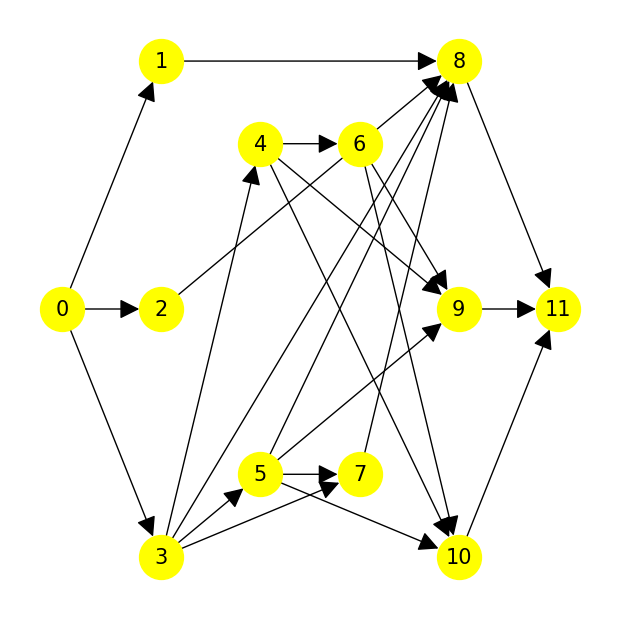

In [35]:
Activity(Act,Time,Prec)

In [36]:
CritPath(G,T)

The Total amount of work to be completed is: 64
The Critical Path is: [0, 3, 5, 7, 8, 11]
The Minimum Completion Time with sufficient workers is: 30
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         5         5
         2         0         5         5
         3         0         0         0
         4         2        18        16
         5         2         2         0
         6         4        20        16
         7         5         5         0
         8        12        12         0
         9         6        22        16
        10         6        22        16
        11        30        30         0


## Q.3 (*) Example from lecture mp305Lj.pdf (slide 6)
Investigate the scheduling of 2 or 3 workers to the example discussed in lectures (slide 6, file mp305Lj.pdf) using the critical path and protection scheduling using the Python functions `CritSchedule(G,T,Nw)`and `ProtSchedule(G,T,Nw)`.
![Network](https://github.com/mcgettrick/mp305/blob/main/Lab3.jpg?raw=1)
With the earliest and latest starting times found verify the scheduling	found by hand.

In [38]:
# Activities
Act = set(["A","B","C","D","E","F"])

# Completion times
Time = dict()
Time["A"] = 2
Time["B"] = 2
Time["C"] = 8
Time["D"] = 5
Time["E"] = 5
Time["F"] = 8


# Precedence dictionary
Prec = dict()
Prec["A"] = set()                     # No predecessors
Prec["B"] = set()                     # No predecessors
Prec["C"] = set()                # No predecessors
Prec["D"] = {"A"}                    # A must before before D
Prec["E"] = {"A"}                     # A must before before E
Prec["F"] = {"D","E"}                     # D and E must finish before F


The Activities have been relabeled with completion times:
Activity  Start  is activity  0  with completion time  0
Activity  A  is activity  1  with completion time  2
Activity  B  is activity  2  with completion time  2
Activity  C  is activity  3  with completion time  8
Activity  E  is activity  4  with completion time  5
Activity  D  is activity  5  with completion time  5
Activity  F  is activity  6  with completion time  8
Activity  Finish  is activity  7  with completion time  0

The Activity Network is decribed by:  {(0, 1), (2, 7), (1, 5), (3, 7), (4, 6), (0, 3), (1, 4), (6, 7), (0, 2), (5, 6)}


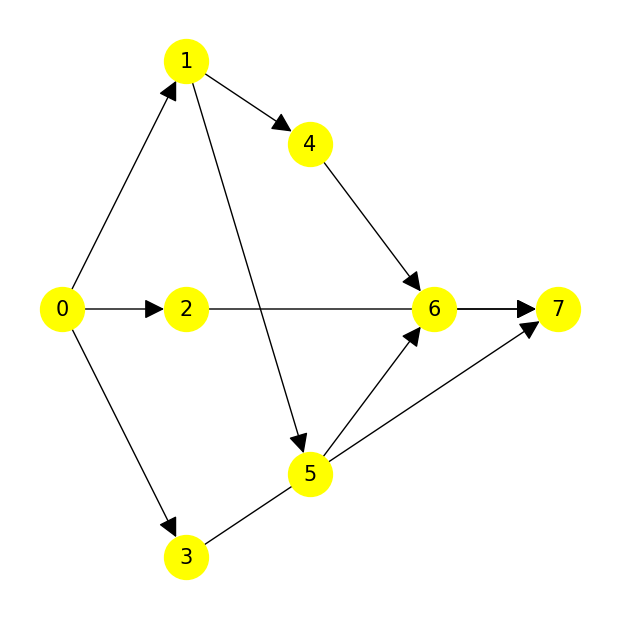

In [39]:
Activity(Act,Time,Prec)

The Total amount of work to be completed is: 30
The Critical Path is: [0, 1, 5, 6, 7]
The Minimum Completion Time with sufficient workers is: 15
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0        13        13
         3         0         7         7
         4         2         2         0
         5         2         2         0
         6         7         7         0
         7        15        15         0

Time= 0 Current activities= {1}

Time= 2 Activity 1 completed
Time= 2 Current activities= {4}

Time= 7 Activity 4 completed
Time= 7 Current activities= {5}

Time= 12 Activity 5 completed
Time= 12 Current activities= {3}

Time= 20 Activity 3 completed
Time= 20 Current activities= {6}

Time= 28 Activity 6 completed
Time= 28 Current activities= {2}

Time= 30 Activity 2 completed

Optimal Schedule Found for 1 Workers!


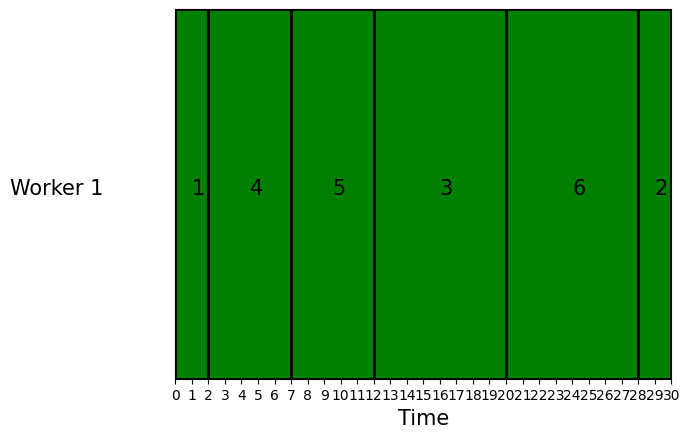

In [40]:
CritSchedule(G,T,1)

The Total amount of work to be completed is: 30
The Critical Path is: [0, 1, 5, 6, 7]
The Minimum Completion Time with sufficient workers is: 15
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0        13        13
         3         0         7         7
         4         2         2         0
         5         2         2         0
         6         7         7         0
         7        15        15         0

Time= 0 Current activities= {1, 3}

Time= 2 Activity 1 completed
Time= 2 Current activities= {3, 4}

Time= 7 Activity 4 completed
Time= 7 Current activities= {3, 5}

Time= 8 Activity 3 completed
Time= 8 Current activities= {2, 5}

Time= 10 Activity 2 completed
Time= 10 Current activities= {5}

Time= 12 Activity 5 completed
Time= 12 Current activities= {6}

Time= 20 Activity 6 completed


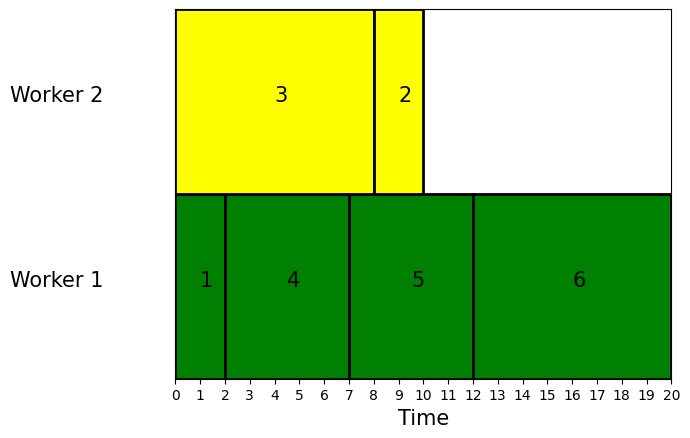

In [41]:
CritSchedule(G,T,2)

The Total amount of work to be completed is: 30
The Critical Path is: [0, 1, 5, 6, 7]
The Minimum Completion Time with sufficient workers is: 15
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0        13        13
         3         0         7         7
         4         2         2         0
         5         2         2         0
         6         7         7         0
         7        15        15         0

Time= 0 Current activities= {1}

Time= 2 Activity 1 completed
Time= 2 Current activities= {4}

Time= 7 Activity 4 completed
Time= 7 Current activities= {5}

Time= 12 Activity 5 completed
Time= 12 Current activities= {3}

Time= 20 Activity 3 completed
Time= 20 Current activities= {2}

Time= 22 Activity 2 completed
Time= 22 Current activities= {6}

Time= 30 Activity 6 completed

Optimal Schedule Found for 1 Workers!


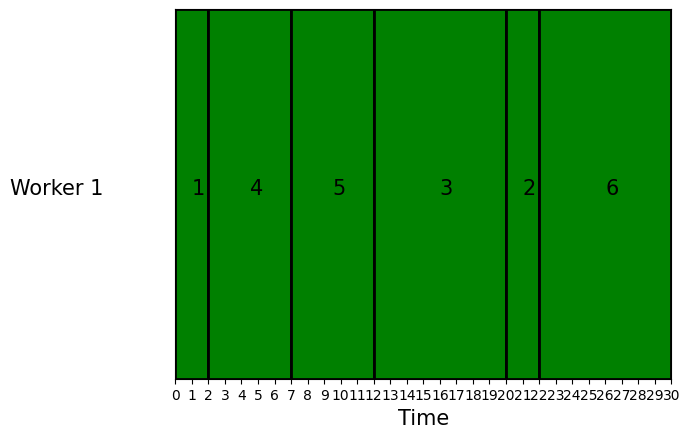

In [42]:
ProtSchedule(G,T,1)

The Total amount of work to be completed is: 30
The Critical Path is: [0, 1, 5, 6, 7]
The Minimum Completion Time with sufficient workers is: 15
    Activity  Earliest    Latest     Float
         0         0         0         0
         1         0         0         0
         2         0        13        13
         3         0         7         7
         4         2         2         0
         5         2         2         0
         6         7         7         0
         7        15        15         0

Time= 0 Current activities= {1}

Time= 2 Activity 1 completed
Time= 2 Current activities= {4, 5}

Time= 7 Activity 4 completed
Time= 7 Activity 5 completed
Time= 7 Current activities= {2, 3}

Time= 9 Activity 2 completed
Time= 9 Current activities= {3, 6}

Time= 15 Activity 3 completed
Time= 15 Current activities= {6}

Time= 17 Activity 6 completed


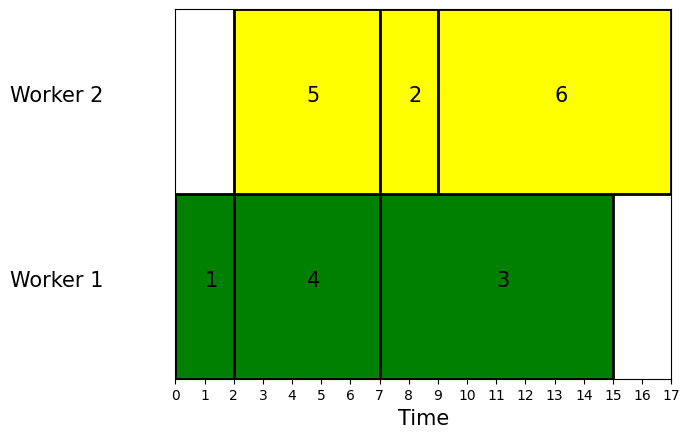

In [43]:
ProtSchedule(G,T,2)

## Q.4 (*) Computer Program Example
A large computer program consists of a number of modules (or subroutines) $M_{1},M_{2},M_{3},$ $M_{4},M_{5}$, $M_{6},M_{7}$ and $M_{8}$.

Each module $M_{i}$ takes a time $T_{i}$ (in minutes) to complete and their completion depend of some preceding modules as follows:
\begin{array}{|c|c|c|c|c|c|c|c|c|}
\hline
\text{Module} & M_{1} & M_{2} & M_{3} & M_{4} & M_{5} & M_{6} & M_{7} & M_{8}
\\
\hline
T_{i} & 2 & 2 & 3 & 2 & 2 & 6 & 3 & 4
\\
\hline
\text{Preceding} & \text{none} & \text{none} & M_{1} & M_{1},M_{2} & M_{1},M_{2} & M_{3},M_{4},M_{5} & M_{3},M_{4},M_{5} & M_{3},M_{7}
\\
\hline
\end{array}

(a) Construct the activity network for this system with standard labeling.

(b) Find the critical path minimal completion time assuming that a sufficient number of parallel processors are available.
What are the earliest and latest starting times for each module?

(c) Find the minimal completion time assuming that only two parallel processors are available using the critical path or protection	scheme scheduling strategies.
What is the average computing time per processor?

(d) A programmer realizes that part of either module $M_{3}$ or $M_{4}$ can placed in module $M_{6}$ at a saving of 1 minute in	for $T_{3}$ or $T_{4}$ but at the expense of 1 minute further in $T_{6}$.
What would you recommend for maximum efficiency given that you have only two parallel processors?